In [1]:
#importing important libraries, others will be imported accordingly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#required table mcdonals.csv loaded
df = pd.read_csv('mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
#check if there is any null values
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [4]:
#size of the dataset
df.shape

(1453, 15)

In [5]:
#summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
#statistical summary. Only age is shown as only this is of int type 
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [7]:
g_count = df[['Gender']].value_counts()
print(g_count)

Gender
Female    788
Male      665
dtype: int64


In [8]:
vf_count = df[['VisitFrequency']].value_counts()
print(vf_count)

VisitFrequency       
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
dtype: int64


In [9]:
l_count = df[['Like']].value_counts()
print(l_count)

Like        
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
dtype: int64


In [10]:
df1 = df.copy() 

In [11]:
new_vf_order = ['Once a week', 'More than once a week', 'Once a month', 'Every three months', 'Once a year', 'Never']
df1.loc[:, 'VisitFrequency'] = pd.Categorical(df1['VisitFrequency'], categories = new_vf_order, ordered = True)
df1.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


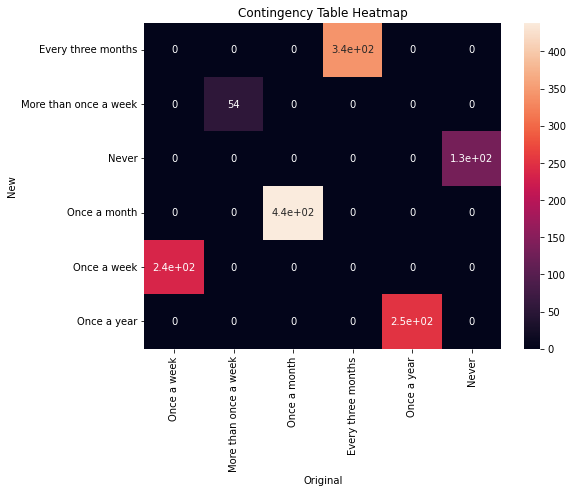

In [12]:
contingency_table = pd.crosstab(df['VisitFrequency'], df1['VisitFrequency'], rownames=['original'], colnames=['new'])
plt.figure(figsize = (8,6))
sns.heatmap(contingency_table, annot = True)

plt.xlabel('Original')
plt.ylabel('New')
plt.title('Contingency Table Heatmap')

plt.show()

In [13]:
print(contingency_table)

new                    Once a week  More than once a week  Once a month  \
original                                                                  
Every three months               0                      0             0   
More than once a week            0                     54             0   
Never                            0                      0             0   
Once a month                     0                      0           439   
Once a week                    235                      0             0   
Once a year                      0                      0             0   

new                    Every three months  Once a year  Never  
original                                                       
Every three months                    342            0      0  
More than once a week                   0            0      0  
Never                                   0            0    131  
Once a month                            0            0      0  
Once a week    

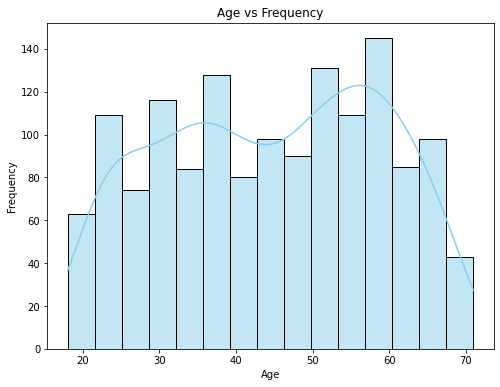

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age vs Frequency')

plt.show()

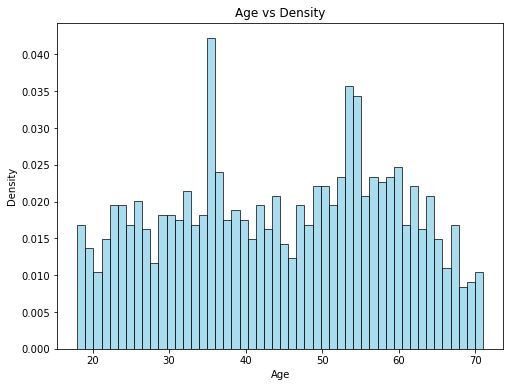

In [15]:
plt.figure(figsize = (8, 6))
plt.hist(df['Age'], bins = 50, density = True, color = 'skyblue', alpha = 0.7, edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age vs Density')

plt.show()

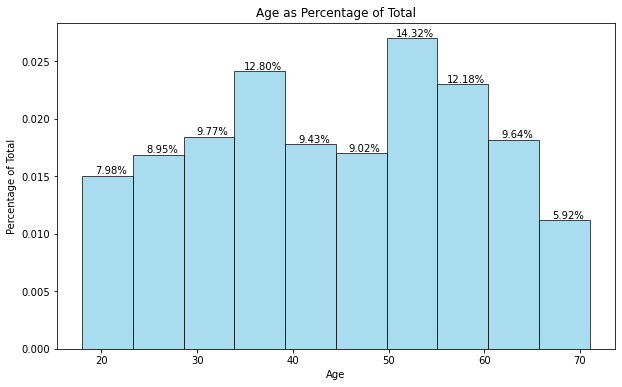

In [16]:
plt.figure(figsize=(10, 6))
n, bins, _ = plt.hist(df['Age'], bins=10, density=True, color='skyblue', alpha=0.7, edgecolor='black')

# Calculate percentages for each bin
percentage = (n / n.sum()) * 100

plt.xlabel('Age')
plt.ylabel('Percentage of Total')
plt.title('Age as Percentage of Total')

#adding percentages above each bar
for i in range(len(bins) - 1):
    plt.text(bins[i] + 3, n[i], f'{percentage[i]:.2f}%', ha='center', va='bottom')

plt.show()

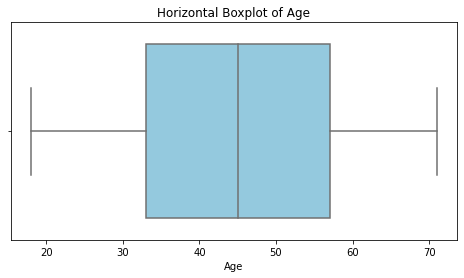

In [17]:
# Create a horizontal boxplot
plt.figure(figsize = (8, 4))
#plt.boxplot(df2['Age'], vert = False, labels = ['Age'])
sns.boxplot(x = 'Age', data = df, orient = 'h', color = 'skyblue')

# Add labels and title
plt.title('Horizontal Boxplot of Age')

# Show the plot
plt.show()

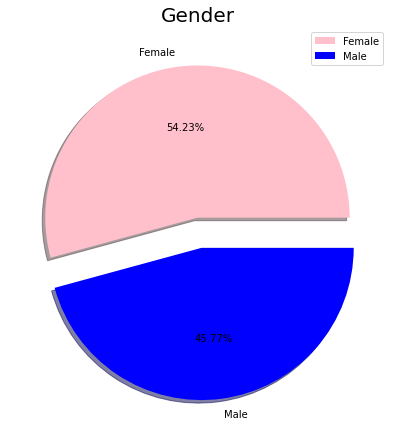

In [18]:
#Gender
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'blue']
explode = [0, 0.2]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

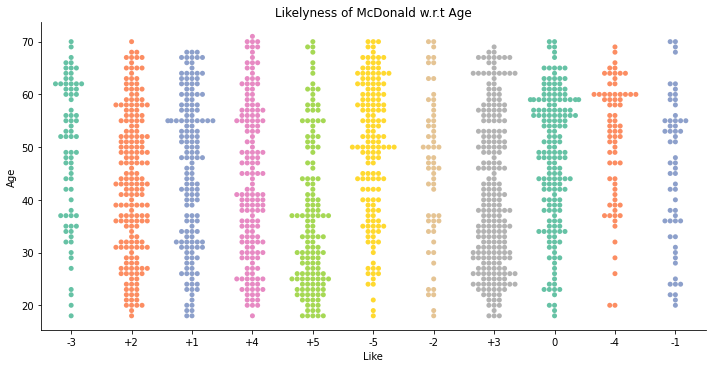

In [19]:
#Customer segmentation - based on pyschographic segmentation

#For convinence renaming the category
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like 
sns.catplot(x="Like", y="Age",data=df, 
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

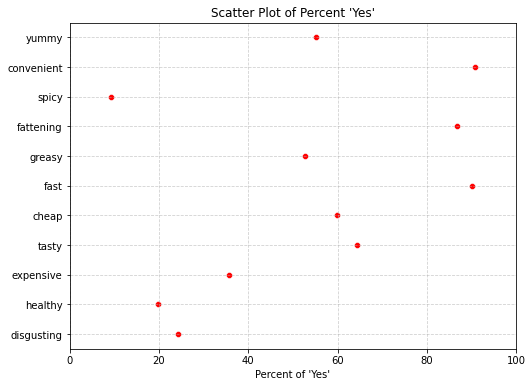

In [20]:
# Calculate the percentage of "yes" values for each column
yes_percentages = (df.iloc[:, :11] == 'Yes').mean() * 100

# Create a dot plot using Seaborn
plt.figure(figsize = (8, 6))
sns.scatterplot(x = yes_percentages.values, y = yes_percentages.index, color = 'red', marker='o')

# Customize the plot
plt.xlabel("Percent of 'Yes'")
plt.xlim(0, 100) #optional
plt.title("Scatter Plot of Percent 'Yes'")

# Show the plot
plt.grid(linestyle = '--', alpha = 0.6)
plt.show()

In [21]:
# Check if each element in columns 1 to 12 is equal to "yes" and convert to binary
MD_x = (df.iloc[:, :11] == 'Yes').astype(int)

# Print the resulting binary DataFrame
MD_x.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [22]:
# Calculate the column-wise mean
col_avg = np.round(MD_x.mean(), 2)
col_avg

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [23]:
MD_x.shape

(1453, 11)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale the DataFrame
MD_scaled = scaler.fit_transform(MD_x)

# Create a new DataFrame with scaled values
df3 = pd.DataFrame(MD_scaled, columns = MD_x.columns)

# Print the scaled DataFrame
df3.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,-1.111479,0.318735,-0.321349,0.391375,-1.054476,0.332951,0.818605,-1.345528,1.339489,-0.498279,-0.566488
1,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,1.339489,-0.498279,-0.566488
2,-1.111479,0.318735,3.111884,0.391375,0.948339,0.332951,-1.221590,0.743203,1.339489,2.006908,-0.566488
3,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,-0.746553,-0.498279,1.765261
4,-1.111479,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,-1.345528,-0.746553,2.006908,-0.566488


In [25]:
from sklearn.decomposition import PCA
k = 10
pca = PCA(n_components = 10)

In [26]:
MD_pca = pca.fit_transform(MD_scaled)
MD_pca.shape

(1453, 10)

In [27]:
explained_variances = pca.explained_variance_ratio_
explained_variances

array([0.25556637, 0.14834762, 0.12546909, 0.09826971, 0.08348356,
       0.07109102, 0.06498559, 0.05384477, 0.04762809, 0.02796379])

In [28]:
std_deviations = np.sqrt(explained_variances)
std_deviations

array([0.50553573, 0.38515922, 0.35421616, 0.31348   , 0.28893522,
       0.26662899, 0.25492271, 0.23204476, 0.2182386 , 0.16722376])

In [29]:
rotation_matrix = pca.components_
rotation_matrix

array([[-0.40695508, -0.30882741, -0.02332033,  0.17786071,  0.26779582,
        -0.21303906, -0.28913434, -0.42611499,  0.29094445, -0.26683857,
         0.41074387],
       [ 0.28261487, -0.04568172,  0.0699822 , -0.20559024, -0.13630029,
        -0.28244059, -0.57503178,  0.24219851,  0.56752776,  0.20103082,
        -0.14388846],
       [-0.25958798, -0.31715142,  0.0201696 , -0.60807736, -0.38956798,
        -0.21139458,  0.1251574 , -0.26964779, -0.18329788,  0.36781371,
         0.09029919],
       [ 0.02623694, -0.00942396,  0.84549641, -0.02339555,  0.33085439,
         0.09036315,  0.11447698,  0.0726908 ,  0.03550987,  0.30198954,
         0.23523093],
       [ 0.34685741, -0.43714795, -0.185551  ,  0.08693385,  0.3437128 ,
        -0.56893862,  0.25698101,  0.2860986 , -0.20736179,  0.05178742,
         0.10584327],
       [-0.12491568,  0.18896641,  0.43866119,  0.1075199 , -0.27832865,
        -0.57273434,  0.02065707, -0.05305267, -0.17116009, -0.4461664 ,
        -0.328

In [30]:
for i, std_dev in enumerate(std_deviations):
    print(f'Standard Deviation (PC{i+1}): {std_dev}')

Standard Deviation (PC1): 0.5055357251664313
Standard Deviation (PC2): 0.38515921815208964
Standard Deviation (PC3): 0.35421615732806433
Standard Deviation (PC4): 0.3134799976014022
Standard Deviation (PC5): 0.28893521872901357
Standard Deviation (PC6): 0.2666289912710452
Standard Deviation (PC7): 0.2549227063676318
Standard Deviation (PC8): 0.23204476498889146
Standard Deviation (PC9): 0.21823860182704266
Standard Deviation (PC10): 0.16722376338128725


In [31]:
# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(k)],
    'Standard Deviation': std_deviations,
    'Proportion of Variance': explained_variances,
    'Cumulative Proportion': np.cumsum(explained_variances)
})

# Print the summary with the required number of digits
#summary_df = summary_df.round({'Standard Deviation': 2,'Variance Explained Ratio': 2,'Cumulative Variance Explained': 2})
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
print(summary_df)

  Principal Component  Standard Deviation  Proportion of Variance  \
0                 PC1                0.51                    0.26   
1                 PC2                0.39                    0.15   
2                 PC3                0.35                    0.13   
3                 PC4                0.31                    0.10   
4                 PC5                0.29                    0.08   
5                 PC6                0.27                    0.07   
6                 PC7                0.25                    0.06   
7                 PC8                0.23                    0.05   
8                 PC9                0.22                    0.05   
9                PC10                0.17                    0.03   

   Cumulative Proportion  
0                   0.26  
1                   0.40  
2                   0.53  
3                   0.63  
4                   0.71  
5                   0.78  
6                   0.85  
7                   0.90

In [32]:
pc_num = np.arange(pca.n_components_) + 1
pc_num

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

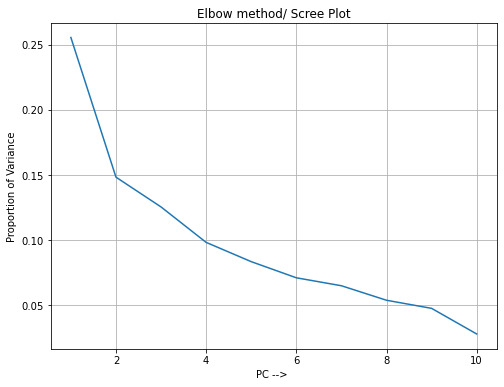

In [33]:
plt.figure(figsize = (8, 6))
plt.plot(pc_num, explained_variances)

plt.title('Elbow method/ Scree Plot')
plt.xlabel('PC --> ')
plt.ylabel('Proportion of Variance')

plt.grid(True)
plt.show()

In [34]:
var = pca.explained_variance_
var

array([2.81316617, 1.6329477 , 1.38111047, 1.08171127, 0.91895162,
       0.78253978, 0.71533376, 0.59270042, 0.52426978, 0.3078135 ])

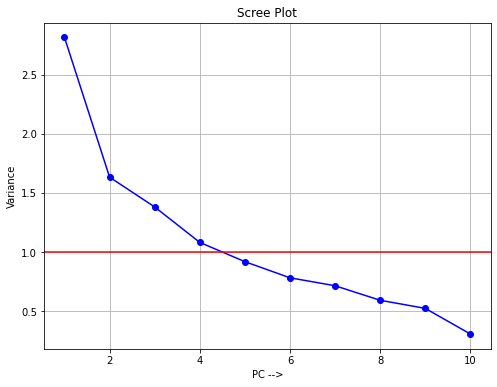

In [35]:
#Alt scree plot Kaiser rule
plt.figure(figsize = (8,6))
plt.plot(pc_num, var, 'bo-')

plt.title('Scree Plot')
plt.xlabel('PC -->')
plt.ylabel('Variance')

plt.axhline(y = 1, color = 'r', linestyle = '-')

plt.grid()
plt.show()

In [36]:
l = 4
pca = PCA(l)

PC = pca.fit_transform(MD_scaled)
PC

array([[ 0.7043341 , -0.43701594,  0.26869753, -0.87207404],
       [-0.46782033,  0.36427698, -1.59683477, -0.00483542],
       [ 0.19198578,  1.71294939, -0.3394127 ,  3.36816847],
       ...,
       [-0.41427514,  1.8104382 , -1.07194798, -0.90103068],
       [-2.80362953,  0.56275909,  2.27888724,  0.0839242 ],
       [ 3.49910468,  1.06999906,  0.14897107, -0.19597725]])

In [37]:
PC.shape

(1453, 4)

In [38]:
std_d = np.sqrt(var)
std_d

array([1.67724959, 1.27786842, 1.17520657, 1.04005349, 0.95861964,
       0.88461278, 0.84577406, 0.76987039, 0.72406476, 0.55480943])

In [39]:
for i, std_dev in enumerate(std_d):
    print(f'Standard Deviation (PC{i+1}): {std_dev:.2f}')

Standard Deviation (PC1): 1.68
Standard Deviation (PC2): 1.28
Standard Deviation (PC3): 1.18
Standard Deviation (PC4): 1.04
Standard Deviation (PC5): 0.96
Standard Deviation (PC6): 0.88
Standard Deviation (PC7): 0.85
Standard Deviation (PC8): 0.77
Standard Deviation (PC9): 0.72
Standard Deviation (PC10): 0.55


In [40]:
### FEATURE SELECTION
MD_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
dtypes: int64(11)
memory usage: 125.0 KB


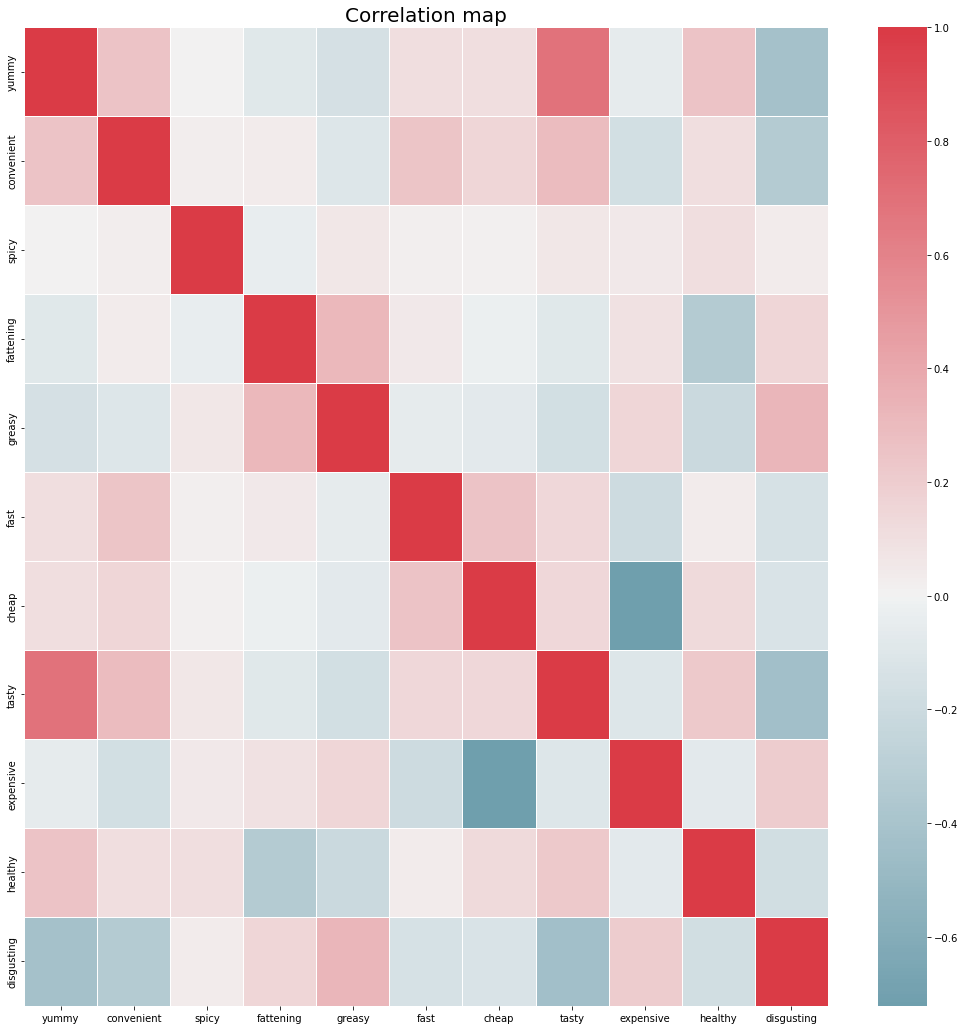

In [41]:
corr = MD_x.corr()

f, ax = plt.subplots(figsize = (18,18))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

heatmap = sns.heatmap(corr, cmap = cmap, center = 0.0, vmax = 1, ax = ax, linewidth = 1)

plt.title('Correlation map', fontsize = 20)
plt.show()

In [42]:
df4 = MD_x.drop(['spicy', 'expensive'], axis = 1)
df4.head()

,yummy,convenient,fattening,greasy,fast,cheap,tasty,healthy,disgusting
0,0,1,1,0,1,1,0,0,0
1,1,1,1,1,1,1,1,0,0
2,0,1,1,1,1,0,1,1,0
3,1,1,1,1,1,1,1,0,1
4,0,1,1,1,1,1,0,1,0


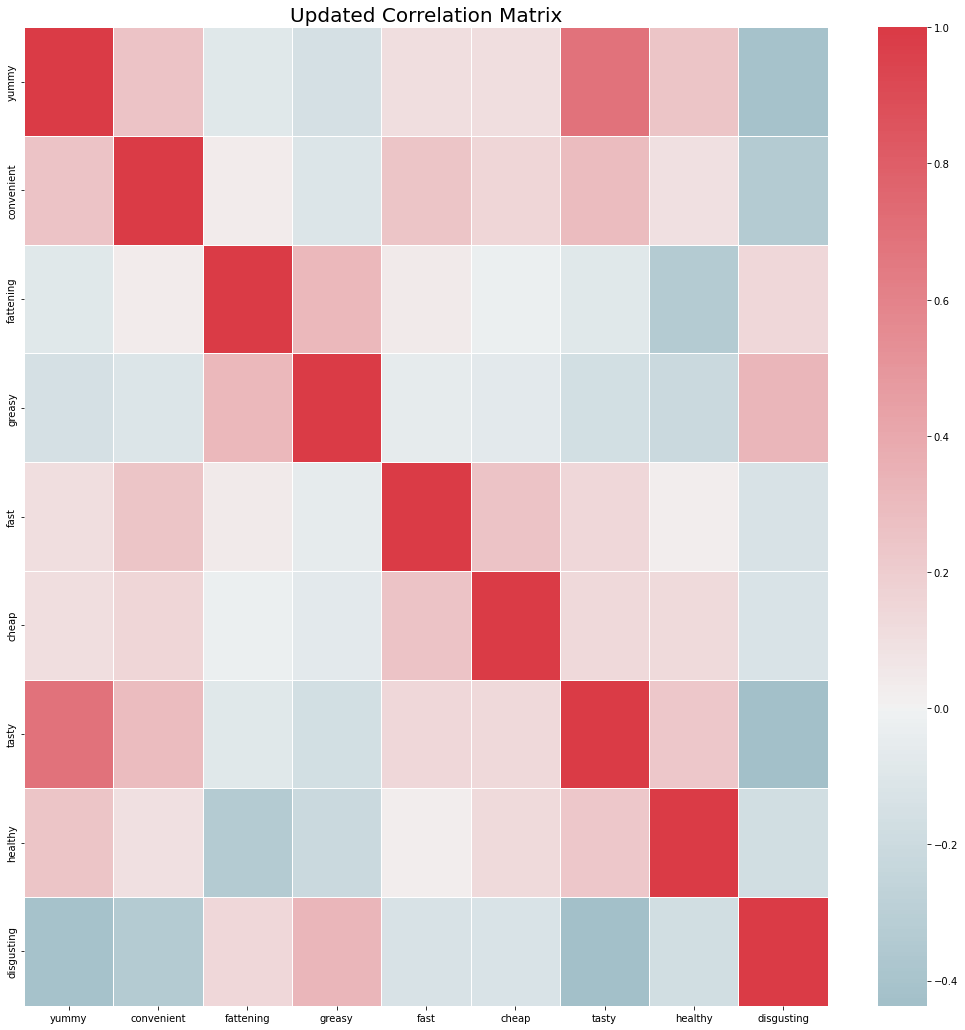

In [43]:
f, ax = plt.subplots(figsize = (18, 18))

corr_m = df4.corr()

cmap = sns.diverging_palette(220,10, as_cmap = True)

heatmap = sns.heatmap(corr_m, cmap = cmap, ax = ax, linewidth = 1, center = 0.0)

plt.title('Updated Correlation Matrix', fontsize = 20)
plt.show()

In [44]:
features = df4.columns
features

Index(['yummy', 'convenient', 'fattening', 'greasy', 'fast', 'cheap', 'tasty',
       'healthy', 'disgusting'],
      dtype='object')

In [45]:
#biplot data
PC1 = PC[:, 0]
PC2 = PC[:, 1]

In [46]:
loadings = pca.components_
loadings

array([[-0.40695508, -0.30882741, -0.02332033,  0.17786071,  0.26779582,
        -0.21303906, -0.28913434, -0.42611499,  0.29094445, -0.26683857,
         0.41074387],
       [ 0.28261487, -0.04568172,  0.0699822 , -0.20559024, -0.13630029,
        -0.28244059, -0.57503178,  0.24219851,  0.56752776,  0.20103082,
        -0.14388846],
       [-0.25958798, -0.31715142,  0.0201696 , -0.60807736, -0.38956798,
        -0.21139458,  0.1251574 , -0.26964779, -0.18329788,  0.36781371,
         0.09029919],
       [ 0.02623694, -0.00942396,  0.84549641, -0.02339555,  0.33085439,
         0.09036315,  0.11447698,  0.0726908 ,  0.03550987,  0.30198954,
         0.23523093]])

In [47]:
loadings.shape

(4, 11)

In [48]:
PC1_scaled = 1.0/(PC1.max() - PC1.min())
PC1_scaled

0.13422552449111508

In [49]:
PC2_scaled = 1.0/(PC2.max() - PC2.min())
PC2_scaled

0.15793244547186122

Text(0, 0.5, 'PC2')

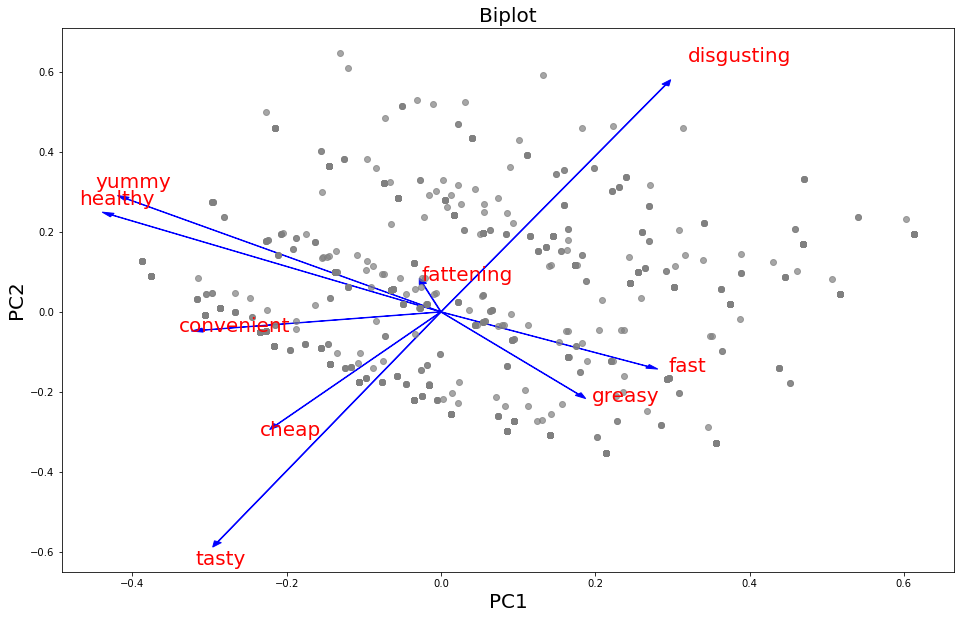

In [50]:
f, ax = plt.subplots(figsize = (16, 10))

for i, feature in enumerate(features):
    ax.arrow(0, 0, loadings[0,i], loadings[1,i], color = 'b', head_width = 0.01)
    ax.text(loadings[0,i]*1.1, loadings[1,i]*1.1, feature, color = 'r', fontsize = 20)
    
ax.scatter(PC1*PC1_scaled, PC2*PC2_scaled, color = 'grey', alpha = 0.7)

ax.set_title('Biplot', fontsize = 20)
ax.set_xlabel('PC1', fontsize = 20)
ax.set_ylabel('PC2', fontsize = 20)

## Extracting Segments

In [64]:
## k-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans.fit(df4)
MD_kmeans_labels = kmeans.fit_predict(df4)

In [53]:
# Specify the range of cluster numbers (2 to 8)
cluster_range = range(2, 9)

# Create dictionaries to store results
results = {"n_clusters": [], "inertia": [], "kmeans_model": []}

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    
    # Store the results for this cluster number
    results["n_clusters"].append(n_clusters)
    results["inertia"].append(kmeans.inertia_)
    results["kmeans_model"].append(kmeans)

# Print the results, including the best number of clusters based on inertia
for i in range(len(cluster_range)):
    print(f"Number of Clusters: {results['n_clusters'][i]}, Inertia: {results['inertia'][i]}")

# Find the best number of clusters based on the lowest inertia
best_index = np.argmin(results["inertia"])
best_n_clusters = results["n_clusters"][best_index]
best_kmeans_model = results["kmeans_model"][best_index]

print(f"Best Number of Clusters: {best_n_clusters}")

Number of Clusters: 2, Inertia: 2145.5037269171585
Number of Clusters: 3, Inertia: 1819.7601235436277
Number of Clusters: 4, Inertia: 1603.020915557054
Number of Clusters: 5, Inertia: 1434.6104173514605
Number of Clusters: 6, Inertia: 1331.896201861035
Number of Clusters: 7, Inertia: 1247.1021329541043
Number of Clusters: 8, Inertia: 1186.873545638332
Best Number of Clusters: 8


In [62]:
columns = ['PC1','PC2','PC3','PC4']
PC_df = pd.DataFrame(data = PC, columns = columns)
PC_df.head()

,PC1,PC2,PC3,PC4
0,0.70,-0.44,0.27,-0.87
1,-0.47,0.36,-1.60,-0.00
2,0.19,1.71,-0.34,3.37
3,-0.12,-1.16,-1.00,0.47
4,-0.03,-1.39,0.79,0.47


In [65]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 509, 3: 260, 2: 336, 0: 348})

In [60]:
#K-means clustering 

print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[4 2 5 ... 5 3 0]
1186.873545638332
11
[[ 1.75438596e-02  5.90643275e-01  7.60233918e-02  9.64912281e-01
   8.65497076e-01  7.13450292e-01  3.50877193e-02  6.43274854e-02
   9.70760234e-01  4.09356725e-02  8.47953216e-01]
 [ 8.44594595e-01  9.76351351e-01  8.78378378e-02  9.12162162e-01
   0.00000000e+00  9.66216216e-01  9.25675676e-01  9.79729730e-01
   2.36486486e-02  2.29729730e-01  1.68918919e-02]
 [ 8.40277778e-01  9.82638889e-01  1.21527778e-01  9.86111111e-01
   1.00000000e+00  9.51388889e-01  8.92361111e-01  9.51388889e-01
   1.14583333e-01  1.84027778e-01  1.28472222e-01]
 [ 9.10891089e-01  9.70297030e-01  1.18811881e-01 -1.11022302e-16
   2.97029703e-02  9.60396040e-01  7.62376238e-01  9.50495050e-01
   1.78217822e-01  9.50495050e-01  9.90099010e-03]
 [-2.22044605e-16  9.41605839e-01  5.83941606e-02  9.19708029e-01
   5.40145985e-01  9.78102190e-01  9.34306569e-01  0.00000000e+00
   2.91970803e-02  1.02189781e-01 -5.55111512e-17]
 [ 9.26605505e-01  9.58715596e-01  9.17431193e

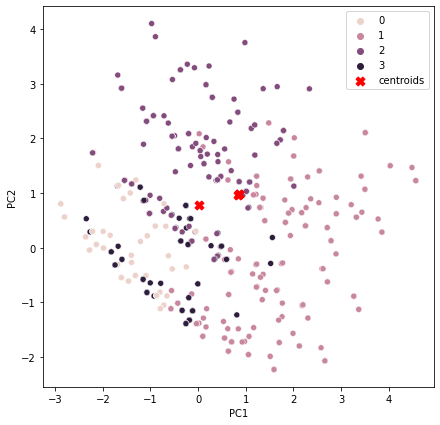

In [67]:
#Visulazing clusters
sns.scatterplot(data = PC_df, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

## Describing Segments

In [69]:
df4.head()

,yummy,convenient,fattening,greasy,fast,cheap,tasty,healthy,disgusting
0,0,1,1,0,1,1,0,0,0
1,1,1,1,1,1,1,1,0,0
2,0,1,1,1,1,0,1,1,0
3,1,1,1,1,1,1,1,0,1
4,0,1,1,1,1,1,0,1,0


In [70]:
df['cluster_num'] = kmeans.labels_ #adding to df
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,1
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,3
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,2
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,3
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,1


In [71]:
crosstab = pd.crosstab(df['cluster_num'],df['Like'])

#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab 

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,2,3,2,2,3,32,40,48,90,62,64
1,143,62,60,43,32,81,35,32,20,1,0
2,4,3,7,6,9,36,44,61,76,50,40
3,3,3,4,8,14,20,33,46,43,47,39


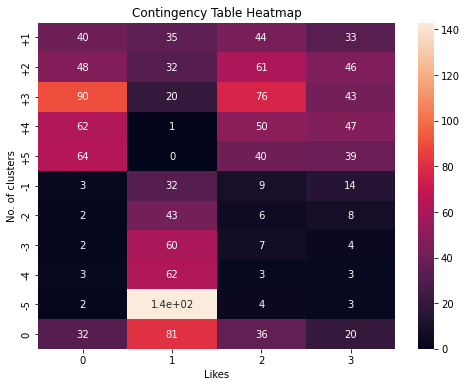

In [78]:
contingency_table = pd.crosstab(df['Like'], df['cluster_num'], rownames=['Likes'], colnames=['k'])

plt.figure(figsize = (8,6))
sns.heatmap(contingency_table, annot = True)

plt.xlabel('Likes')
plt.ylabel('No. of clusters')
plt.title('Contingency Table Heatmap')

plt.show()

In [80]:
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])

contingency_table = pd.crosstab(df['Gender'], df['cluster_num'], rownames=['Likes'], colnames=['k'])
contingency_table

k,0,1,2,3
Likes,,,,
Female,208,262,167,151
Male,140,247,169,109


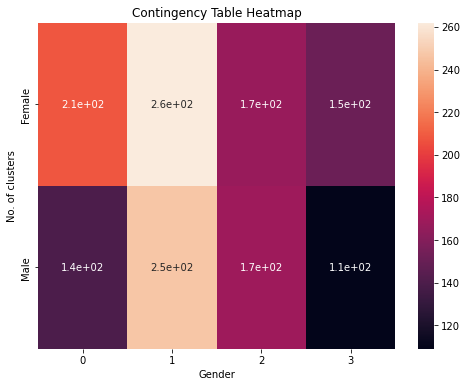

In [81]:
plt.figure(figsize = (8,6))
sns.heatmap(contingency_table, annot = True)

plt.xlabel('Gender')
plt.ylabel('No. of clusters')
plt.title('Contingency Table Heatmap')

plt.show()

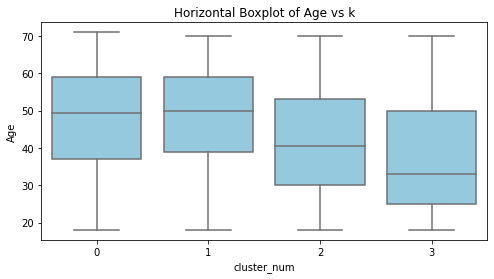

In [83]:
# Create a horizontal boxplot
plt.figure(figsize = (8, 4))
#plt.boxplot(df2['Age'], vert = False, labels = ['Age'])
sns.boxplot(x = 'cluster_num', y = 'Age', data = df, color = 'skyblue')

# Add labels and title
plt.title('Horizontal Boxplot of Age vs k')

# Show the plot
plt.show()

## Selecting target segment

In [85]:
#Calculating the mean
#Visit frequency
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['VisitFrequency'] = le.fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.59
1,1,2.72
2,2,2.51
3,3,2.69


In [86]:
#Like
df['Like'] = le.fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.08
1,1,6.89
2,2,3.19
3,3,3.18


In [87]:
#Gender
df['Gender'] = le.fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.40
1,1,0.49
2,2,0.50
3,3,0.42


In [88]:
segment = Gender.merge(visit, on='cluster_num', how='left').merge(Like, on='cluster_num', how='left')
segment

,cluster_num,Gender,VisitFrequency,Like
0,0,0.40,2.59,3.08
1,1,0.49,2.72,6.89
2,2,0.50,2.51,3.19
3,3,0.42,2.69,3.18


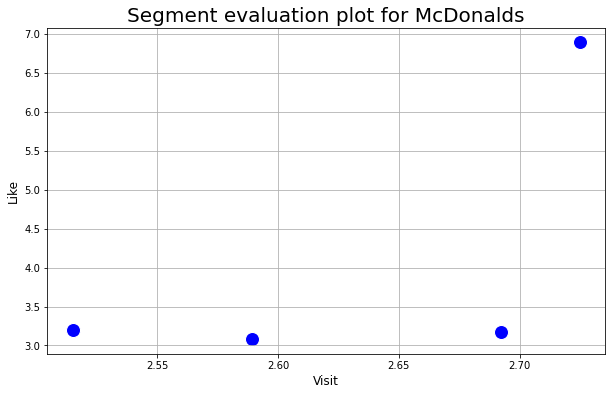

In [97]:
#Target segments

plt.figure(figsize = (10,6))
sns.scatterplot(x = "VisitFrequency", y = "Like",data = segment,s = 200, color="b")

plt.title("Segment evaluation plot for McDonalds", fontsize = 20) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 

plt.grid(True)
plt.show()

## trying Agglomerative Hierchical Clustering

In [106]:
data = df.iloc[:, 11:15].values
data

array([[ 7, 61,  0,  0],
       [ 1, 51,  0,  0],
       [ 0, 62,  0,  0],
       ...,
       [ 2, 52,  3,  0],
       [ 3, 41,  0,  1],
       [ 7, 30,  0,  1]])

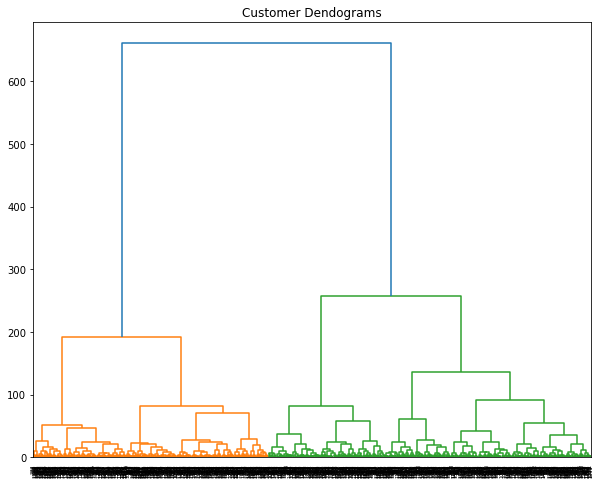

In [109]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10,8))
plt.title('Customer Dendograms')
dend = shc.dendrogram(shc.linkage(data, method = 'ward'))

In [113]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
labels_ = cluster.fit_predict(data)
labels_

array([0, 0, 0, ..., 0, 1, 1])

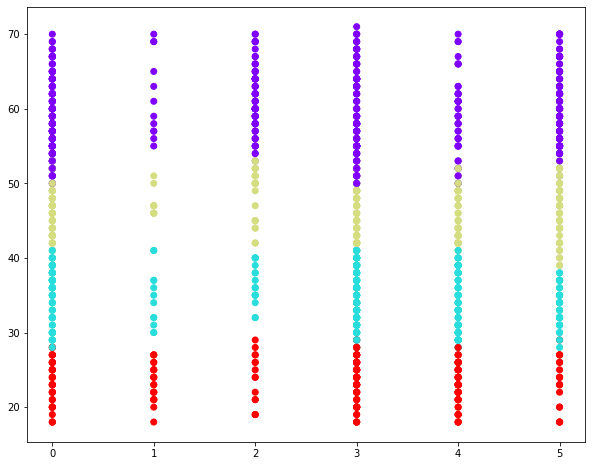

In [119]:
plt.figure(figsize = (10,8))
plt.scatter(data[:, 2], data[:, 1], c = cluster.labels_, cmap = 'rainbow')